<a href="https://colab.research.google.com/github/RaviNaik/ERA-S5/blob/main/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
sys.path.insert(0, "./drive/MyDrive/ERA/Session5")

In [2]:
import torch
import torch.optim as optim

In [3]:
from utils import (get_dataloaders, display_sample_images, GetCorrectPredCount,
train, test, plot_results, get_model_summary)

from model import Net

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda") if cuda else "cpu"

CUDA Available? True


In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 
'shuffle': True, 
'num_workers': 2, 
'pin_memory': True}

train_loader, test_loader = get_dataloaders(kwargs)

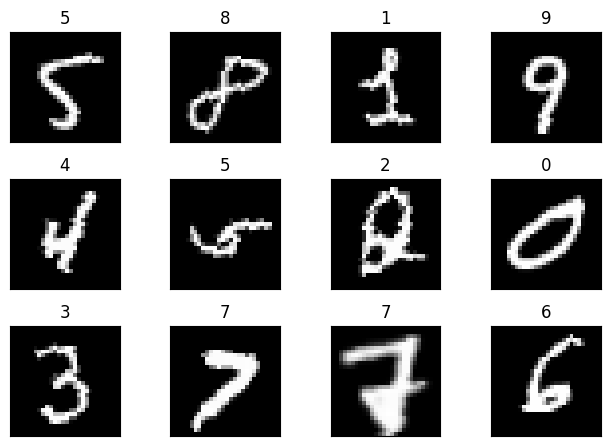

In [6]:
batch_data, batch_label = next(iter(train_loader)) 

display_sample_images(batch_data, batch_label)

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [8]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_losses, train_acc = train(model, device, train_loader, optimizer, train_losses, train_acc)
  test_losses, test_acc = test(model, device, test_loader, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.9515 Batch_id=117 Accuracy=27.00: 100%|██████████| 118/118 [00:24<00:00,  4.90it/s]


Test set: Average loss: 2.0224, Accuracy: 3910/10000 (39.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1351 Batch_id=117 Accuracy=74.50: 100%|██████████| 118/118 [00:23<00:00,  5.04it/s]


Test set: Average loss: 0.1325, Accuracy: 9598/10000 (95.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1428 Batch_id=117 Accuracy=94.98: 100%|██████████| 118/118 [00:24<00:00,  4.75it/s]


Test set: Average loss: 0.0751, Accuracy: 9765/10000 (97.65%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0556 Batch_id=117 Accuracy=96.47: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]


Test set: Average loss: 0.0580, Accuracy: 9810/10000 (98.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0677 Batch_id=117 Accuracy=97.05: 100%|██████████| 118/118 [00:22<00:00,  5.22it/s]


Test set: Average loss: 0.0480, Accuracy: 9847/10000 (98.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1123 Batch_id=117 Accuracy=97.50: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]


Test set: Average loss: 0.0394, Accuracy: 9869/10000 (98.69%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1103 Batch_id=117 Accuracy=97.83: 100%|██████████| 118/118 [00:23<00:00,  5.01it/s]


Test set: Average loss: 0.0499, Accuracy: 9844/10000 (98.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0299 Batch_id=117 Accuracy=97.98: 100%|██████████| 118/118 [00:23<00:00,  4.93it/s]


Test set: Average loss: 0.0348, Accuracy: 9883/10000 (98.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0122 Batch_id=117 Accuracy=98.19: 100%|██████████| 118/118 [00:26<00:00,  4.52it/s]


Test set: Average loss: 0.0323, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0258 Batch_id=117 Accuracy=98.38: 100%|██████████| 118/118 [00:23<00:00,  4.95it/s]


Test set: Average loss: 0.0362, Accuracy: 9876/10000 (98.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.1226 Batch_id=117 Accuracy=98.46: 100%|██████████| 118/118 [00:23<00:00,  5.05it/s]


Test set: Average loss: 0.0281, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1457 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0276, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0521 Batch_id=117 Accuracy=98.54: 100%|██████████| 118/118 [00:23<00:00,  5.08it/s]


Test set: Average loss: 0.0267, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0059 Batch_id=117 Accuracy=98.66: 100%|██████████| 118/118 [00:24<00:00,  4.89it/s]


Test set: Average loss: 0.0247, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0080 Batch_id=117 Accuracy=98.69: 100%|██████████| 118/118 [00:24<00:00,  4.78it/s]


Test set: Average loss: 0.0252, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0654 Batch_id=117 Accuracy=98.97: 100%|██████████| 118/118 [00:24<00:00,  4.90it/s]


Test set: Average loss: 0.0219, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0542 Batch_id=117 Accuracy=98.97: 100%|██████████| 118/118 [00:22<00:00,  5.17it/s]


Test set: Average loss: 0.0218, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0731 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0224, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0054 Batch_id=117 Accuracy=99.00: 100%|██████████| 118/118 [00:23<00:00,  5.10it/s]


Test set: Average loss: 0.0215, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0058 Batch_id=117 Accuracy=98.99: 100%|██████████| 118/118 [00:24<00:00,  4.85it/s]


Test set: Average loss: 0.0213, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-03.


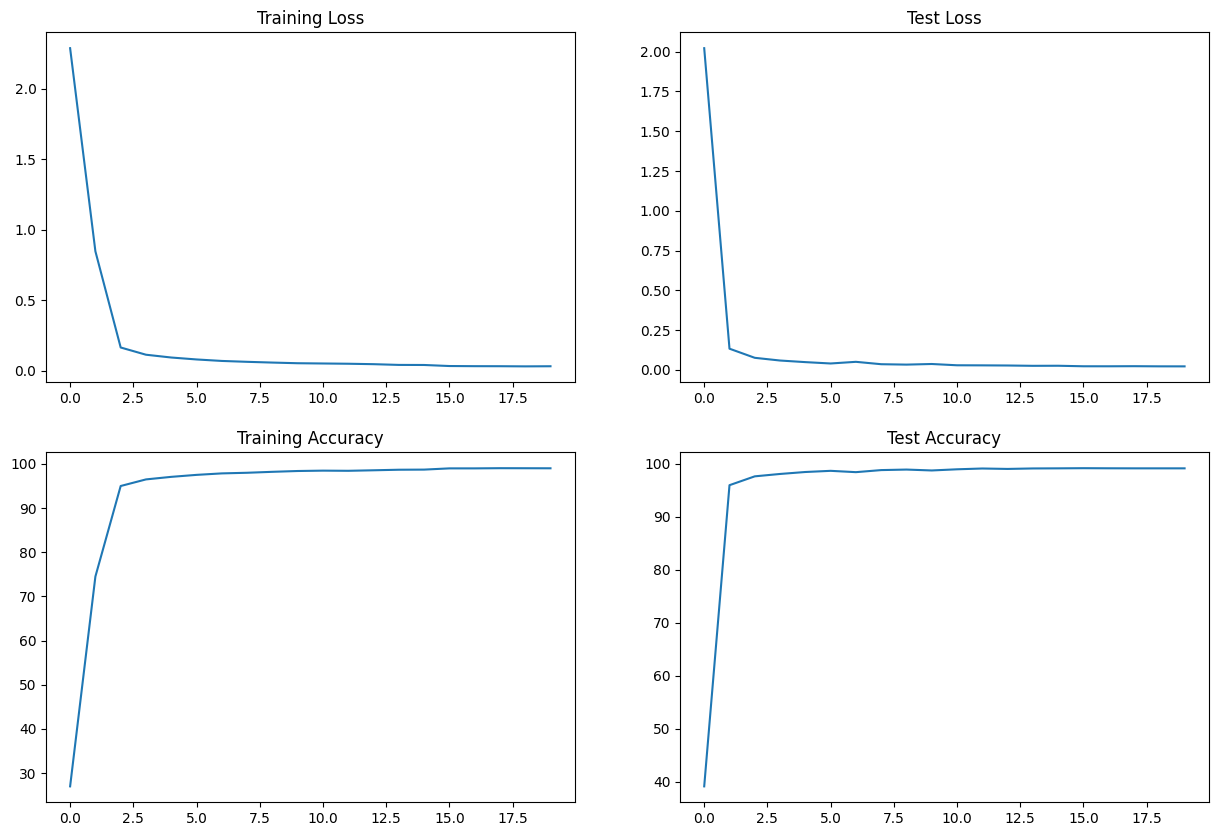

In [9]:
plot_results(train_losses, train_acc, test_losses, test_acc)

In [10]:
get_model_summary(Net, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------
